## Classifier Overfitting (part 2)

**Aim:** Understand the notion of overfitting and underfitting.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Auxiliary functions

You can use the functions you have made in the previous exercise, or you can use the following ones. 

In [3]:
import sklearn.datasets

def get_digits_data(digit_list=None):
    X,y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
    if digit_list is None:
        return X,y
    X_sel = np.vstack([X[y==t]for t in digit_list])
    y_sel = y.copy()
    y_sel = np.hstack([y_sel[y==t]for t in digit_list])
    return X_sel,y_sel

def plot_digit(x, shape):
    plt.figure(figsize=(2,2))
    img = x.reshape(*shape)
    plt.imshow(img, cmap='gray_r')
    plt.axis(False)
    plt.show()
    
def plot_digits(X,y, shape, n_images_per_row=5):
    n = X.shape[0]
    size = 1
    n_rows = int(np.ceil(n/n_images_per_row))
    fig, axs = plt.subplots(n_rows, n_images_per_row, figsize=(size*n_images_per_row,size*n_rows))
    for i, (x, t) in enumerate(zip(X,y)): 
        img = x.reshape(*shape)
        col_index = i % n_images_per_row
        row_index = i // n_images_per_row
        axs[row_index, col_index].imshow(img, cmap='gray_r')
        axs[row_index, col_index].set_title(t)
        axs[row_index, col_index].set_axis_off() 
    fig.tight_layout() 
    plt.show()

def add_input_noise(X, amount=16):
    return X + (np.random.rand(*X.shape)*2*amount - amount)

def add_target_noise(y, amount=.5):
    n = int(len(y)*amount)
    ids = np.random.randint(len(y),size=(2,n))
    y_p = y.copy()
    y_p[ids[0]]=y[ids[1]]
    y_p[ids[1]]=y[ids[0]]
    return y_p

def sample(X,y,n_samples):
    n = X.shape[0]
    assert n_samples < n
    ids = np.random.permutation(n)[:n_samples]
    return X[ids],y[ids]

## Question 1

Make a function `classifier = train(X_train, y_train, param)` that takes in input a data matrix `X_train`, an associated target array `y_train`, and a single scalar parameter `param` and returns a fit classifier object. 

Make a function `preds = test(X_test, classifier)` that takes in input a data matrix `X_test`, a classifier object `classifier` and returns the prediction array `preds`.

Specialise the functions using the following scikit classifiers:
1. [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) 
- tunable parameter `alpha` 
- fixed parameters:
  - max_iter=10000
  - activation='logistic'
  - hidden_layer_sizes=(5,5)
2. [k-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- tunable parameter `n_neighbors` 
3. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)
- tunable parameter `max_leaf_nodes` and `max_depth`
- fixed parameters:
  - n_estimators=10

You should therefore make the following functions (all with the same interface):
- `train_mlp`, `test_mlp`
- `train_knn`, `test_knn`
- `train_rf`, `test_rf`

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
def train_mlp(X_train, y_train, param):
    model = MLPClassifier(alpha=param,max_iter=10000,activation='logistic',hidden_layer_sizes=(5,5))
    model.fit(X_train, y_train)
    return model

def test_mlp(X_test, classifier):
    predictions = classifier.predict(X_test)
    return predictions
    # YOUR CODE HERE
    
    
def train_knn(X_train, y_train, param):
    # YOUR CODE HERE
    model = KNeighborsClassifier(n_neighbors=param)
    model.fit(X_train, y_train)
    return model

def test_knn(X_test, classifier):
    # YOUR CODE HERE
    predictions = classifier.predict(X_test)
    return predictions
    
def train_rf(X_train, y_train, param):
    # YOUR CODE HERE
    model = RandomForestClassifier(n_estimators=param)
    model.fit(X_train, y_train)
    return model

def test_rf(X_test, classifier):
    # YOUR CODE HERE
    predictions = classifier.predict(X_test)
    return predictions

In [5]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
n_instances=1000
X_train = np.random.rand(n_instances, 100)
y_train = np.random.randint(2,size=n_instances)
X_test = np.random.rand(n_instances, 100)
y_test = np.random.randint(2,size=n_instances)

clf = train_mlp(X_train, y_train, param=1e-3)
y_pred = test_mlp(X_test, clf)
assert 0.7 > np.sum(y_test==y_pred)/len(y_pred) > 0.3, 'For mlp expected a prediction accuracy in the interval [0.3,0.7]'

clf = train_knn(X_train, y_train, param=11)
y_pred = test_knn(X_test, clf)
assert 0.7 > np.sum(y_test==y_pred)/len(y_pred) > 0.3, 'For knn expected a prediction accuracy in the interval [0.3,0.7]'

clf = train_rf(X_train, y_train, param=5)
y_pred = test_knn(X_test, clf)
assert 0.7 > np.sum(y_test==y_pred)/len(y_pred) > 0.3, 'For rf expected a prediction accuracy in the interval [0.3,0.7]'
### END TESTS

## Question 2

a) Make a function `error(y_true, y_pred)` that returns the fraction of times `y_pred` does not agree with `y_true`.

b) Make a function `train_error, test_error = compute_error_curve(train_func, test_func, params, X_train, y_train, X_test, y_test)` that outputs the error on the training data `X_train` and the error on the test data `X_test` using the train/test functions in input. The errors are estimated for each value of the parameters in `params`.

c) Make a function `plot_error_curve(params, train_err, test_err, logscale)` to plot the errors on the train data and test data for each value of `params`. Use the input argument `logscale=True/False` to choose between a logscale and a linear scale for the horizontal axis.  

You should obtain something like:
<img src='plot_overfit.png' width=500>

In [6]:
def error(y_true, y_pred):
    # YOUR CODE HERE
    result = y_true == y_pred
    num_errors = np.count_nonzero(result==False)
    return (num_errors/len(y_true))
    
def plot_error_curve(params, train_err, test_err, logscale=False):
    # YOUR CODE HERE
    fig,ax  = plt.subplots(figsize=(5,3))
    if logscale == True:
        ax.plot(params,train_err,color='red',label='Train')
        ax.set_xlabel('Params')
        ax.set_ylabel('Train Error')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(params,test_err,label='Test')
        ax2.set_ylabel('Test Error')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.legend()
        plt.grid()
        plt.show()
    else:
        ax.plot(params,train_err,color='red',label='Train')
        ax.set_xlabel('Params')
        ax.set_ylabel('Train Error')
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(params,test_err,label='Test')
        ax2.set_ylabel('Test Error')
        ax2.legend()
        plt.grid()
        plt.show()


def compute_error_curve(train_func, test_func, params, X_train, y_train, X_test, y_test):
    # YOUR CODE HERE
    error_fraction_test = []
    error_fraction_train = []
    for i in params:
        model = train_func(X_train, y_train,i)
        predictions_test = test_func(X_test,model)
        predictions_train = test_func(X_train,model)
        error_fraction_test.append(error(y_test,predictions_test))
        error_fraction_train.append(error(y_train,predictions_train))

    return (error_fraction_train, error_fraction_test)

    

In [7]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
assert np.fabs(error(np.array([1,1,1,1]),np.array([0,1,1,1])) - 0.25) < 1e-3, 'The error function is not accurate'
### END TESTS

In [8]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
from sklearn.neighbors import KNeighborsClassifier
def train_knn_p(X_train, y_train, param):
    return KNeighborsClassifier(n_neighbors=param).fit(X_train, y_train)

def test_knn_p(X_test, classifier):
    return classifier.predict(X_test)

n_instances=1000
X_train = np.random.rand(n_instances, 100)
y_train = np.random.randint(2,size=n_instances)
X_test = np.random.rand(n_instances, 100)
y_test = np.random.randint(2,size=n_instances)
params=[1,3,5,7]
train_error, test_error = compute_error_curve(train_knn_p, test_knn_p, params, X_train, y_train, X_test, y_test)

assert train_error[0] < 1e-3, 'Train error for 1-nn should be close to 0'
assert np.fabs(np.mean(test_error) - 0.5)< 1e-1, 'Test error should be close to 0.5'
### END TESTS

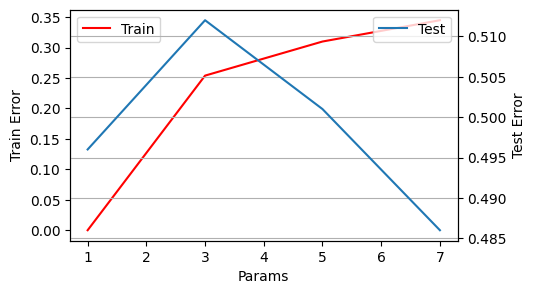

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
from sklearn.neighbors import KNeighborsClassifier
def train_knn_p(X_train, y_train, param):
    return KNeighborsClassifier(n_neighbors=param).fit(X_train, y_train)

def test_knn_p(X_test, classifier):
    return classifier.predict(X_test)

n_instances=1000
X_train = np.random.rand(n_instances, 100)
y_train = np.random.randint(2,size=n_instances)
X_test = np.random.rand(n_instances, 100)
y_test = np.random.randint(2,size=n_instances)
params=[1,3,5,7]
train_err, test_err = compute_error_curve(train_knn_p, test_knn_p, params, X_train, y_train, X_test, y_test)

try:
    plot_error_curve(params, train_err, test_err, logscale=False)
except Exception:
    assert False, 'the function should not raise an exception when asked to plot the train and test errors'
else:
    pass
### END TESTS

---

## Question 3

Experiment with the data generation and the classifiers parameters.

Try to obtain a dataset and a range of parameters that show how various classifiers can overfit and underfit. 

For the data generation consider:
- the amount of input and target noise 
- the dataset size and the train/test split proportion

Fopr example:
```python
X,y = get_digits_data(digit_list=None)
X = add_input_noise(X, amount=5)
y = add_target_noise(y, amount=.2)
X,y = sample(X,y,n_samples=1000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

params = np.arange(1,30,2)
train_err, test_err = compute_error_curve(train_knn, test_knn, params, X_train, y_train, X_test, y_test)
plot_error_curve(params, train_err, test_err, logscale=False)
```

---

## Question 4

a) Make a function `compute_error_curve_with_conf_int(train_func, test_func, params, X, y, test_size, n_repetitions)` that takes in input a data matrix `X` with associated target array `y` and repeats `n_repetitions` times a random train/test split (in a proportion specified by `test_size`). Each time an estimate of the error curve is computed. The function outputs a list of test error curves (i.e. for semplicity do not output the train error).

b) Make a function `plot_error_curve_with_intervals(params, errors, logscale)` that visualises the list of test error curves reporting the 25% the 50% and the 75% percentile of the errors in a way similar to:

<img src='plot_overfit_int.png' width=500>

In [17]:
from sklearn.model_selection import train_test_split
def compute_error_curve_with_conf_int(train_func, test_func, params, X, y, test_size, n_repetitions=30):
    # YOUR CODE HERE
    error_per_iteration = []
    for i in range(n_repetitions):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
        train_error,test_error = compute_error_curve(train_func, test_func, params, X_train, y_train, X_test, y_test)
        error_per_iteration.append(test_error)
    return error_per_iteration
    
def plot_error_curve_with_intervals(params, errors, logscale=False):
    # YOUR CODE HERE
    percentile_1 = np.percentile(errors,0.12, axis=0)
    print(percentile_1)
    errors = np.mean(errors, axis=0)
    quantiles = [25,50,75]
    if(logscale == True):
        plt.plot(params,errors,color='red')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylabel('Test Error')
        plt.xlabel('Train Error')
        plt.fill_between(params,errors-percentile_1,errors+percentile_1,label='25%')
        #plt.fill_between(params,errors-np.percentile(errors,quantiles[1]),errors+np.percentile(errors,quantiles[1]),color='red',lable='50%')
        #plt.fill_between(params,errors-np.percentile(errors,quantiles[2]),errors+np.percentile(errors,quantiles[2]),color='green',label='75%')
        plt.legend()
        plt.show()
    else:
        plt.plot(params,errors,color='red')
        plt.ylabel('Test Error')
        plt.xlabel('Train Error')
        plt.fill_between(params,errors-percentile_1,errors+percentile_1,label='25%')
        #plt.fill_between(params,errors-np.percentile(errors,quantiles[1]),errors+np.percentile(errors,quantiles[1]),color='red',label='50%')
        #plt.fill_between(params,errors-np.percentile(errors,quantiles[2]),errors+np.percentile(errors,quantiles[2]),color='green',label='75%')
        plt.legend()
        plt.show()


In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
from sklearn.neighbors import KNeighborsClassifier
def train_knn_p(X_train, y_train, param):
    return KNeighborsClassifier(n_neighbors=param).fit(X_train, y_train)

def test_knn_p(X_test, classifier):
    return classifier.predict(X_test)

n_instances=1000
X = np.random.rand(n_instances, 100)
y = np.random.randint(2,size=n_instances)
params=[1,3,5,7]

test_errors = compute_error_curve_with_conf_int(train_knn_p, test_knn_p, params, X, y, test_size=.5, n_repetitions=30)

assert np.std(np.mean(test_errors, axis=1)) < 1e-1, 'The dispersion around test errors should be small'
### END TESTS

[0.440216 0.380648 0.42     0.340432]


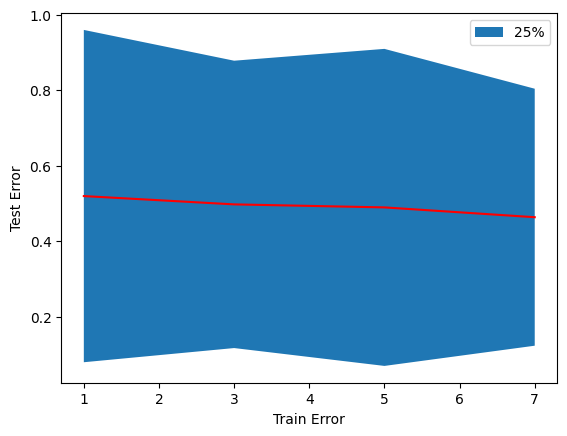

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 
### BEGIN TESTS
from sklearn.neighbors import KNeighborsClassifier
def train_knn_p(X_train, y_train, param):
    return KNeighborsClassifier(n_neighbors=param).fit(X_train, y_train)

def test_knn_p(X_test, classifier):
    return classifier.predict(X_test)

n_instances=100
X = np.random.rand(n_instances, 10)
y = np.random.randint(2,size=n_instances)
params=[1,3,5,7]

test_errors = compute_error_curve_with_conf_int(train_knn_p, test_knn_p, params, X, y, test_size=.5, n_repetitions=10)

try:
    plot_error_curve_with_intervals(params, test_errors, logscale=False)
except Exception:
    assert False, 'the function should not raise an exception when asked to plot the train and test errors'
else:
    pass
### END TESTS

---